In [1]:
import numpy as np
from data_prep import *
from build_and_train import *

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sudharsangopalakrishnan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sudharsangopalakrishnan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sudharsangopalakrishnan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pickle
  
# Open the file in binary mode
def get_train_valid_test():
    with open('training_data/variables/train.pkl', 'rb') as file:
        
        # Call load method to deserialze
        train = pickle.load(file)
    with open('training_data/variables/valid.pkl', 'rb') as file:
        
        # Call load method to deserialze
        valid = pickle.load(file)
    with open('training_data/variables/test.pkl', 'rb') as file:
        
        # Call load method to deserialze
        test = pickle.load(file)
  
    return train, valid, test

In [3]:
train, valid, test = get_train_valid_test()

In [4]:
train, valid, test

(                                                    text  label
 0      grow b 1965 watch love thunderbird mate school...      0
 1      put movie dvd player sit coke chip expectation...      0
 2      people know particular time past like feel nee...      0
 3      even though great interest biblical movie bore...      0
 4      im die hard dad army fan nothing ever change g...      1
 ...                                                  ...    ...
 39995  western union something forget classic western...      1
 39996  movie incredible piece work explore every nook...      1
 39997  wife watch movie plan visit sicily stromboli s...      0
 39998  first watch flatliners amaze necessary feature...      1
 39999  would film good gross estimate 95000000 award ...      1
 
 [40000 rows x 2 columns],
                                                    text  label
 0     14 year since sharon stone award viewer legcro...      0
 1     someone need make car payment truly awful make...      0

In [5]:
def remove_pattern(text,pattern):
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    return text

In [6]:
train['text'] = np.vectorize(remove_pattern)(train['text'], "@[\w]*")
valid['text'] = np.vectorize(remove_pattern)(valid['text'], "@[\w]*")
test['text'] = np.vectorize(remove_pattern)(test['text'], "@[\w]*")

In [7]:
train, valid, test

(                                                    text  label
 0      grow b 1965 watch love thunderbird mate school...      0
 1      put movie dvd player sit coke chip expectation...      0
 2      people know particular time past like feel nee...      0
 3      even though great interest biblical movie bore...      0
 4      im die hard dad army fan nothing ever change g...      1
 ...                                                  ...    ...
 39995  western union something forget classic western...      1
 39996  movie incredible piece work explore every nook...      1
 39997  wife watch movie plan visit sicily stromboli s...      0
 39998  first watch flatliners amaze necessary feature...      1
 39999  would film good gross estimate 95000000 award ...      1
 
 [40000 rows x 2 columns],
                                                    text  label
 0     14 year since sharon stone award viewer legcro...      0
 1     someone need make car payment truly awful make...      0

In [8]:
train['text'] = train['text'].str.replace("[^a-zA-Z#]", " ")
valid['text'] = valid['text'].str.replace("[^a-zA-Z#]", " ")
test['text'] = test['text'].str.replace("[^a-zA-Z#]", " ")
train, valid, test

(                                                    text  label
 0      grow b      watch love thunderbird mate school...      0
 1      put movie dvd player sit coke chip expectation...      0
 2      people know particular time past like feel nee...      0
 3      even though great interest biblical movie bore...      0
 4      im die hard dad army fan nothing ever change g...      1
 ...                                                  ...    ...
 39995  western union something forget classic western...      1
 39996  movie incredible piece work explore every nook...      1
 39997  wife watch movie plan visit sicily stromboli s...      0
 39998  first watch flatliners amaze necessary feature...      1
 39999  would film good gross estimate          award ...      1
 
 [40000 rows x 2 columns],
                                                    text  label
 0        year since sharon stone award viewer legcro...      0
 1     someone need make car payment truly awful make...      0

In [9]:
train['text'] = train['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
valid['text'] = valid['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test['text'] = test['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train, valid, test

(                                                    text  label
 0      grow watch love thunderbird mate school watch ...      0
 1      movie player coke chip expectation movie would...      0
 2      people know particular time past like feel nee...      0
 3      even though great interest biblical movie bore...      0
 4      hard army nothing ever change tape audiobooks ...      1
 ...                                                  ...    ...
 39995  western union something forget classic western...      1
 39996  movie incredible piece work explore every nook...      1
 39997  wife watch movie plan visit sicily stromboli s...      0
 39998  first watch flatliners amaze necessary feature...      1
 39999  would film good gross estimate award nominatio...      1
 
 [40000 rows x 2 columns],
                                                    text  label
 0     year since sharon stone award viewer legcrossi...      0
 1     someone need make payment truly awful make jea...      0

In [10]:
tokenized_tweet_train = train['text'].apply(lambda x: x.split())
tokenized_tweet_valid = valid['text'].apply(lambda x: x.split())
tokenized_tweet_test = test['text'].apply(lambda x: x.split())
tokenized_tweet_train, tokenized_tweet_valid, tokenized_tweet_test

(0        [grow, watch, love, thunderbird, mate, school,...
 1        [movie, player, coke, chip, expectation, movie...
 2        [people, know, particular, time, past, like, f...
 3        [even, though, great, interest, biblical, movi...
 4        [hard, army, nothing, ever, change, tape, audi...
                                ...                        
 39995    [western, union, something, forget, classic, w...
 39996    [movie, incredible, piece, work, explore, ever...
 39997    [wife, watch, movie, plan, visit, sicily, stro...
 39998    [first, watch, flatliners, amaze, necessary, f...
 39999    [would, film, good, gross, estimate, award, no...
 Name: text, Length: 40000, dtype: object,
 0       [year, since, sharon, stone, award, viewer, le...
 1       [someone, need, make, payment, truly, awful, m...
 2       [guideline, state, comment, must, contain, min...
 3       [movie, muddle, mishmash, clich, recent, cinem...
 4       [stan, laurel, become, smaller, half, alltime,...
  

In [11]:
for i in range(len(tokenized_tweet_train)):
    tokenized_tweet_train[i] = ' '.join(tokenized_tweet_train[i])
train['text'] = tokenized_tweet_train

for i in range(len(tokenized_tweet_valid)):
    tokenized_tweet_valid[i] = ' '.join(tokenized_tweet_valid[i])
valid['text'] = tokenized_tweet_valid

for i in range(len(tokenized_tweet_test)):
    tokenized_tweet_test[i] = ' '.join(tokenized_tweet_test[i])
test['text'] = tokenized_tweet_test

train, valid, test

(                                                    text  label
 0      grow watch love thunderbird mate school watch ...      0
 1      movie player coke chip expectation movie would...      0
 2      people know particular time past like feel nee...      0
 3      even though great interest biblical movie bore...      0
 4      hard army nothing ever change tape audiobooks ...      1
 ...                                                  ...    ...
 39995  western union something forget classic western...      1
 39996  movie incredible piece work explore every nook...      1
 39997  wife watch movie plan visit sicily stromboli s...      0
 39998  first watch flatliners amaze necessary feature...      1
 39999  would film good gross estimate award nominatio...      1
 
 [40000 rows x 2 columns],
                                                    text  label
 0     year since sharon stone award viewer legcrossi...      0
 1     someone need make payment truly awful make jea...      0

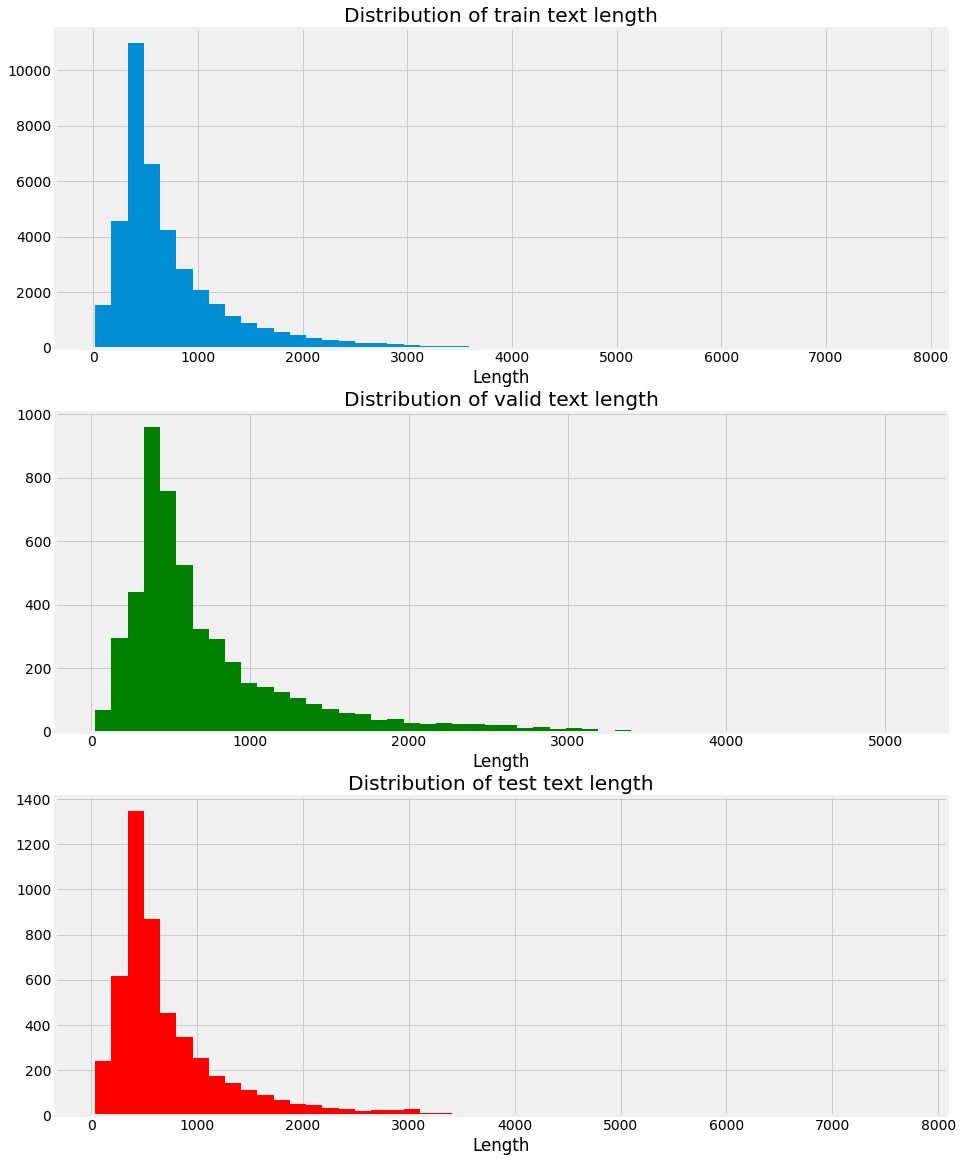

In [12]:
(X_train, X_valid, X_test), (y_train, y_valid, y_test) = split_train_valid_test(train, valid, test)
view_text_length(X_train, X_valid, X_test)

In [13]:
all_words_positive = ' '.join(text for text in train['text'][train['label']==1])

In [14]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [15]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

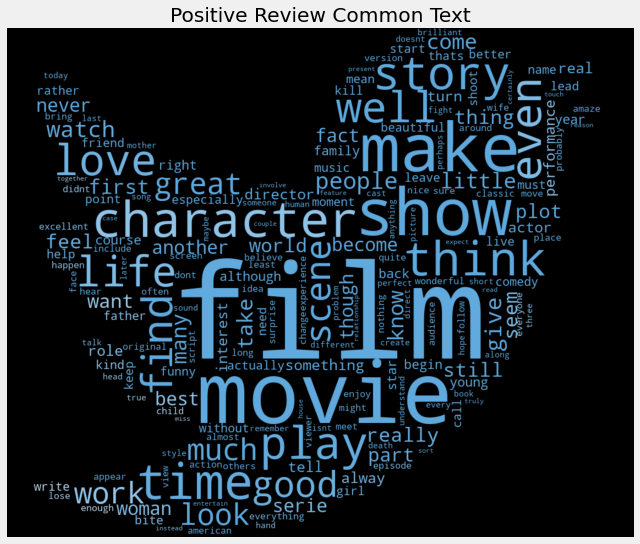

<Figure size 432x288 with 0 Axes>

In [16]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Positive Review Common Text')
plt.axis('off')
plt.show()
plt.savefig('results/PositiveWC.png')

In [17]:
all_words_negative = ' '.join(text for text in train['text'][train['label']==0])

In [18]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

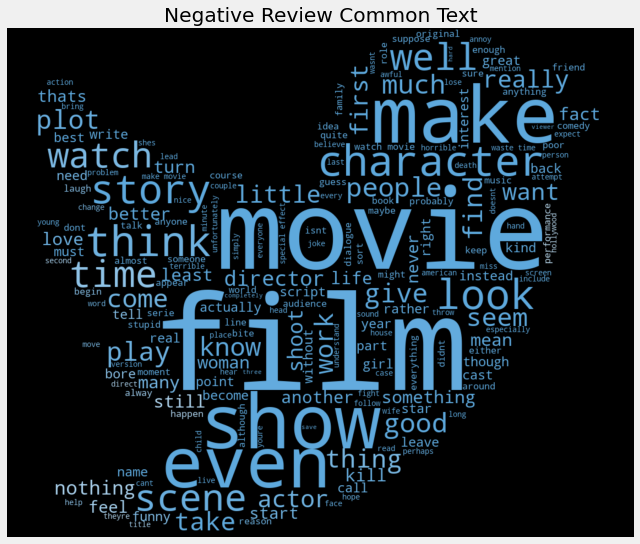

<Figure size 432x288 with 0 Axes>

In [19]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Negative Review Common Text')
plt.axis('off')
plt.show()
plt.savefig('results/NegativeWC.png')

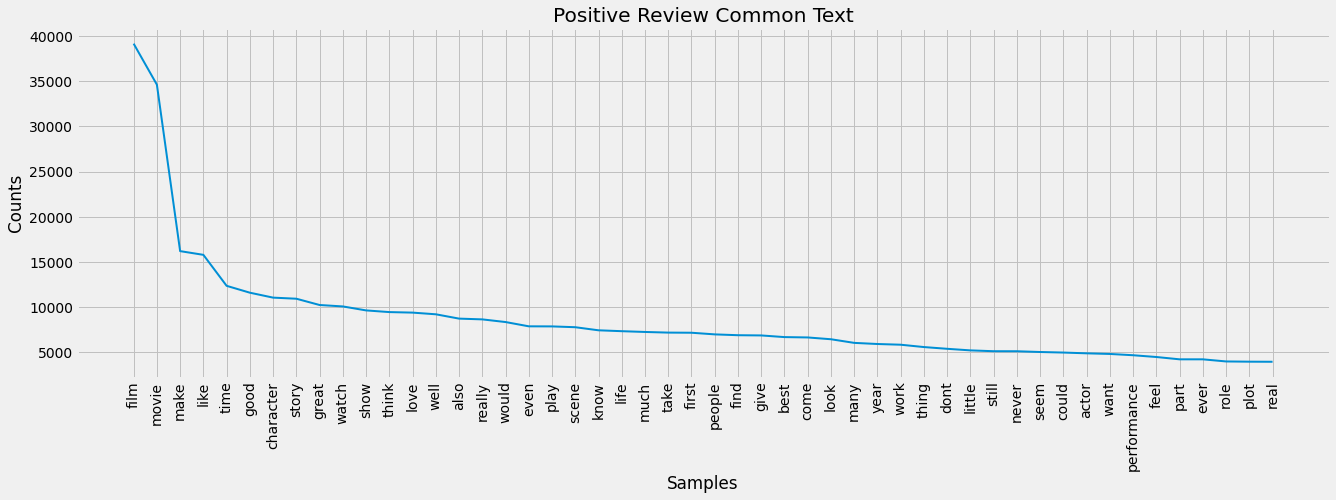

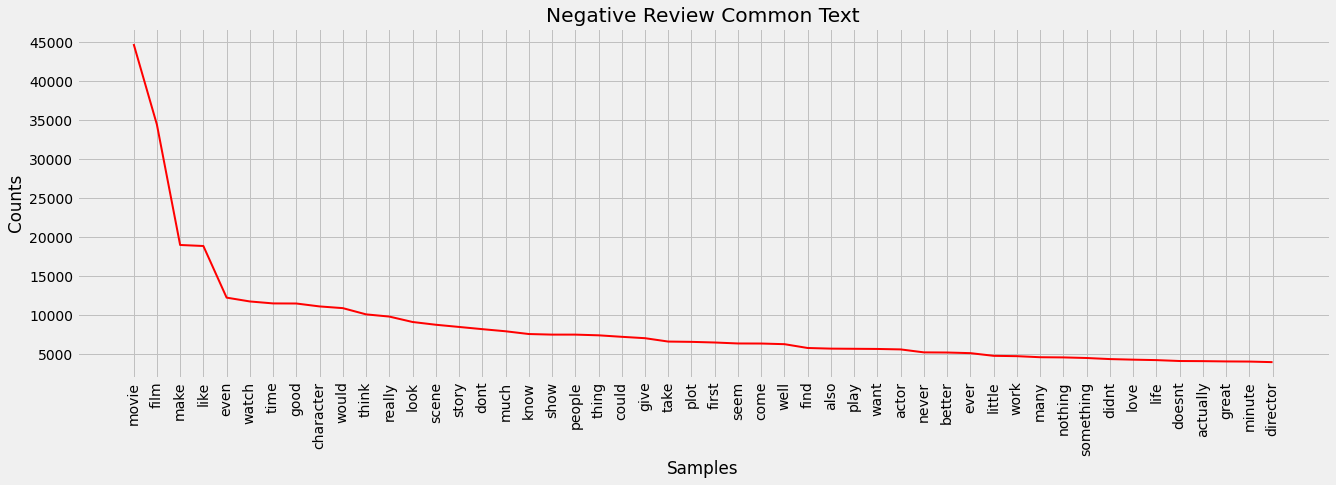

In [20]:
view_common_words(train)

In [21]:
X_train, X_valid, X_test, size_of_vocabulary = prepare_data(X_train, X_valid, X_test)

Vocabulary Size: 132703


In [22]:
model, es, mc = build_BiLSTM(size_of_vocabulary)

2022-08-11 00:11:56.680382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          16985984  
                                                                 
 bidirectional (Bidirectiona  (None, 120, 128)         98816     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3

In [23]:
from keras.utils import plot_model
import visualkeras

In [24]:
visualkeras.layered_view(model, to_file="BiLSTM.png", legend=True) # without custom font

TypeError: 'int' object is not iterable

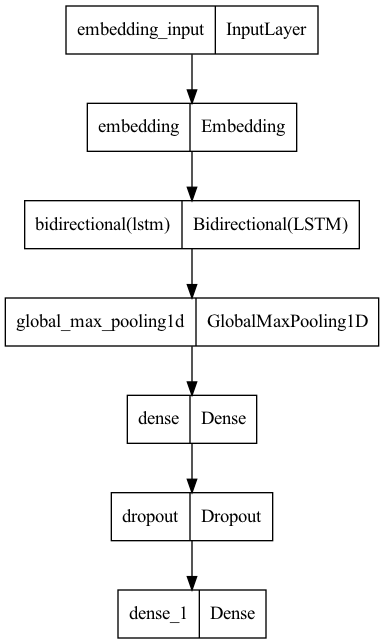

In [25]:
plot_model(model, to_file="BiLSTM.png")

In [23]:
model, history = fit(model, X_train, X_valid, y_train, y_valid, es, mc)

Epoch 1/4
313/313 [==============================] - ETA: 0s - loss: 0.3905 - accuracy: 0.8167
Epoch 1: val_accuracy improved from -inf to 0.88320, saving model to best_model.h5
313/313 [==============================] - 133s 410ms/step - loss: 0.3905 - accuracy: 0.8167 - val_loss: 0.2783 - val_accuracy: 0.8832
Epoch 2/4
313/313 [==============================] - ETA: 0s - loss: 0.1647 - accuracy: 0.9389
Epoch 2: val_accuracy did not improve from 0.88320
313/313 [==============================] - 136s 434ms/step - loss: 0.1647 - accuracy: 0.9389 - val_loss: 0.3131 - val_accuracy: 0.8746
Epoch 3/4
313/313 [==============================] - ETA: 0s - loss: 0.0722 - accuracy: 0.9749
Epoch 3: val_accuracy did not improve from 0.88320
313/313 [==============================] - 137s 438ms/step - loss: 0.0722 - accuracy: 0.9749 - val_loss: 0.4389 - val_accuracy: 0.8636
Epoch 4/4
313/313 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9883
Epoch 4: val_accuracy did not 

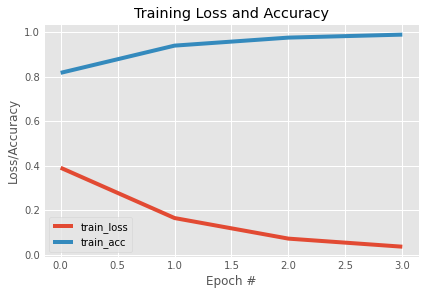

In [24]:
plot_training(history)

In [25]:
get_accuracy_and_loss(model, X_test, y_test)

157/157 [==============================] - 4s 27ms/step - loss: 0.5071 - accuracy: 0.8632
Test Accuracy: 86.32000088691711%
Test Loss: 0.5070685148239136%


(0.8632000088691711, 0.5070685148239136)

In [26]:
X_train.shape

(40000, 120)

In [27]:
import pandas as pd

In [28]:
food_desert_data = pd.read_csv('food_desert_data(testing)/Food_Deserts_and_Insecurity.csv')
food_desert_data

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,0,Edith McDonald White,New Orleans,"New Orleans strong, and will always be proud t...",False,2022-08-04 20:38:02+00:00,RT @FoPRR: Waving thanks to the kind donor who...,NaN,Twitter for iPhone
1,1,FriendsPineRidgeRes,NaN,Friends of Pine Ridge Reservation - Making lif...,False,2022-08-04 20:37:40+00:00,Waving thanks to the kind donor who sent cerea...,NaN,Twitter for iPad
2,2,"Laura McShane, MLIS, MLA","Cleveland, OH",Committed to living small-Retired librarian-cr...,False,2022-08-03 16:31:05+00:00,@JosephWMead @rebecca__maurer @jsantanaward14 ...,NaN,Twitter Web App
3,3,soup bird,NaN,gender,False,2022-08-03 06:11:33+00:00,RT @FoPRR: Do something kind! Help feed a Lako...,"['food', 'peanutbutter', 'beans', 'formula', '...",vehement_soup
4,4,FriendsPineRidgeRes,NaN,Friends of Pine Ridge Reservation - Making lif...,False,2022-08-03 05:55:04+00:00,Do something kind! Help feed a Lakota family w...,"['food', 'peanutbutter', 'beans', 'formula', '...",Twitter for iPad
...,...,...,...,...,...,...,...,...,...
485,485,Aluma🦋,NaN,tigiraweyitī💛❤️ ሰብ ኮንካ ትግራዋይ ኩን,False,2022-08-02 11:19:22+00:00,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ...","['SouthSudan', 'Somalia', 'Ethiopia', 'FoodIns...",Twitter for iPhone
486,486,Rahwa Gal Erob💊⛱,NaN,ትግራይ ትዕወት💊💊💊💊💪💪💪https://t.co/tOrf5zUFGF,False,2022-08-02 11:16:29+00:00,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ...","['SouthSudan', 'Somalia', 'Ethiopia', 'FoodIns...",Twitter for Android
487,487,Rahel yoseif,NaN,NaN,False,2022-08-02 11:06:09+00:00,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ...","['SouthSudan', 'Somalia', 'Ethiopia', 'FoodIns...",Twitter for iPhone
488,488,Robel,NaN,NaN,False,2022-08-02 11:03:05+00:00,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ...","['SouthSudan', 'Somalia', 'Ethiopia', 'FoodIns...",Twitter for Android


In [29]:
location = np.array(food_desert_data['user_location'])
text = np.array(food_desert_data['text'])

In [30]:
text_df = pd.DataFrame(food_desert_data['text'])
text_df

,text
0,RT @FoPRR: Waving thanks to the kind donor who...
1,Waving thanks to the kind donor who sent cerea...
2,@JosephWMead @rebecca__maurer @jsantanaward14 ...
3,RT @FoPRR: Do something kind! Help feed a Lako...
4,Do something kind! Help feed a Lakota family w...
...,...
485,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ..."
486,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ..."
487,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ..."
488,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ..."


In [31]:
text_df['text'].apply(lambda x:Preprocessing(x))

0      rt foprr wave thank kind donor send cereal tun...
1      wave thank kind donor send cereal tuna rice ve...
2      josephwmead rebecca__maurer jsantanaward14 cle...
3      rt foprr something kind help fee lakota family...
4      something kind help fee lakota family wa donat...
                             ...                        
485    rt seifgebre southsudan somalia amp ethiopia 4...
486    rt seifgebre southsudan somalia amp ethiopia 4...
487    rt seifgebre southsudan somalia amp ethiopia 4...
488    rt seifgebre southsudan somalia amp ethiopia 4...
489    rt seifgebre southsudan somalia amp ethiopia 4...
Name: text, Length: 490, dtype: object

In [32]:
text_df

,text
0,RT @FoPRR: Waving thanks to the kind donor who...
1,Waving thanks to the kind donor who sent cerea...
2,@JosephWMead @rebecca__maurer @jsantanaward14 ...
3,RT @FoPRR: Do something kind! Help feed a Lako...
4,Do something kind! Help feed a Lakota family w...
...,...
485,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ..."
486,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ..."
487,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ..."
488,"RT @SeifGebre: In #SouthSudan, #Somalia &amp; ..."


In [33]:
def remove_pattern(text,pattern):
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    return text

In [34]:
text_df['text'] = np.vectorize(remove_pattern)(text_df['text'], "@[\w]*")

In [35]:
text_df

,text
0,RT : Waving thanks to the kind donor who sent ...
1,Waving thanks to the kind donor who sent cerea...
2,FTR both council reps inherited nightmare...
3,RT : Do something kind! Help feed a Lakota fam...
4,Do something kind! Help feed a Lakota family w...
...,...
485,"RT : In #SouthSudan, #Somalia &amp; #Ethiopia ..."
486,"RT : In #SouthSudan, #Somalia &amp; #Ethiopia ..."
487,"RT : In #SouthSudan, #Somalia &amp; #Ethiopia ..."
488,"RT : In #SouthSudan, #Somalia &amp; #Ethiopia ..."


In [36]:
text_df['text'] = text_df['text'].str.replace("[^a-zA-Z#]", " ")
text_df

,text
0,RT Waving thanks to the kind donor who sent ...
1,Waving thanks to the kind donor who sent cerea...
2,FTR both council reps inherited nightmare...
3,RT Do something kind Help feed a Lakota fam...
4,Do something kind Help feed a Lakota family w...
...,...
485,RT In #SouthSudan #Somalia amp #Ethiopia ...
486,RT In #SouthSudan #Somalia amp #Ethiopia ...
487,RT In #SouthSudan #Somalia amp #Ethiopia ...
488,RT In #SouthSudan #Somalia amp #Ethiopia ...


In [37]:
text_df['text'] = text_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
text_df

,text
0,Waving thanks kind donor sent cereal tuna rice...
1,Waving thanks kind donor sent cereal tuna rice...
2,both council reps inherited nightmare from the...
3,something kind Help feed Lakota family donatio...
4,something kind Help feed Lakota family donatio...
...,...
485,#SouthSudan #Somalia #Ethiopia million facing ...
486,#SouthSudan #Somalia #Ethiopia million facing ...
487,#SouthSudan #Somalia #Ethiopia million facing ...
488,#SouthSudan #Somalia #Ethiopia million facing ...


In [38]:
tokenized_tweet = text_df['text'].apply(lambda x: x.split())
tokenized_tweet

0      [Waving, thanks, kind, donor, sent, cereal, tu...
1      [Waving, thanks, kind, donor, sent, cereal, tu...
2      [both, council, reps, inherited, nightmare, fr...
3      [something, kind, Help, feed, Lakota, family, ...
4      [something, kind, Help, feed, Lakota, family, ...
                             ...                        
485    [#SouthSudan, #Somalia, #Ethiopia, million, fa...
486    [#SouthSudan, #Somalia, #Ethiopia, million, fa...
487    [#SouthSudan, #Somalia, #Ethiopia, million, fa...
488    [#SouthSudan, #Somalia, #Ethiopia, million, fa...
489    [#SouthSudan, #Somalia, #Ethiopia, million, fa...
Name: text, Length: 490, dtype: object

In [39]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

text_df['text'] = tokenized_tweet
text_df

,text
0,Waving thanks kind donor sent cereal tuna rice...
1,Waving thanks kind donor sent cereal tuna rice...
2,both council reps inherited nightmare from the...
3,something kind Help feed Lakota family donatio...
4,something kind Help feed Lakota family donatio...
...,...
485,#SouthSudan #Somalia #Ethiopia million facing ...
486,#SouthSudan #Somalia #Ethiopia million facing ...
487,#SouthSudan #Somalia #Ethiopia million facing ...
488,#SouthSudan #Somalia #Ethiopia million facing ...


In [40]:
food_test = text_df['text']

In [41]:
from keras.preprocessing.text import Tokenizer

In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(food_test)
food_test = tokenizer.texts_to_sequences(food_test)
food_test=pad_sequences(food_test,maxlen=120)
size_of_vocabulary = len(tokenizer.word_index)+1
print("Vocabulary Size: " + str(size_of_vocabulary))

Vocabulary Size: 1562


In [43]:
food_sentiment = model.predict(food_test)

16/16 [==============================] - 1s 26ms/step


In [44]:
food_sentiment

array([[6.2979572e-02],
       [3.7354434e-01],
       [6.3450581e-01],
       [4.7097784e-01],
       [9.7439748e-01],
       [3.7107399e-01],
       [1.6624072e-01],
       [1.6624072e-01],
       [1.6624072e-01],
       [1.6624072e-01],
       [2.6420197e-01],
       [2.5821507e-01],
       [3.7107399e-01],
       [6.4792925e-01],
       [2.5821507e-01],
       [2.5821507e-01],
       [3.7107399e-01],
       [8.7827581e-01],
       [4.9332408e-03],
       [4.9332408e-03],
       [4.9332408e-03],
       [4.9332408e-03],
       [9.0449966e-02],
       [2.0204057e-01],
       [2.0204057e-01],
       [2.0204057e-01],
       [2.5821507e-01],
       [2.5821507e-01],
       [2.5821507e-01],
       [2.5821507e-01],
       [7.7877767e-02],
       [2.0204057e-01],
       [2.0204057e-01],
       [2.0204057e-01],
       [2.0204057e-01],
       [1.6941662e-01],
       [7.2861576e-01],
       [5.0365382e-01],
       [5.0365382e-01],
       [8.1971705e-02],
       [8.3720124e-01],
       [7.745091

In [45]:
food_sentiment_labels = food_sentiment.reshape(490,)
for i in range(len(food_sentiment_labels)):
    food_sentiment_labels[i] = int(round(food_sentiment_labels[i]))

In [46]:
food = pd.DataFrame({'text':text_df['text'].values, 'label':food_sentiment_labels})
food

,text,label
0,Waving thanks kind donor sent cereal tuna rice...,0.0
1,Waving thanks kind donor sent cereal tuna rice...,0.0
2,both council reps inherited nightmare from the...,1.0
3,something kind Help feed Lakota family donatio...,0.0
4,something kind Help feed Lakota family donatio...,1.0
...,...,...
485,#SouthSudan #Somalia #Ethiopia million facing ...,1.0
486,#SouthSudan #Somalia #Ethiopia million facing ...,1.0
487,#SouthSudan #Somalia #Ethiopia million facing ...,1.0
488,#SouthSudan #Somalia #Ethiopia million facing ...,1.0


In [47]:
food['label'] = food['label'].apply(lambda x: x * -1 + 1)

In [48]:
food

,text,label
0,Waving thanks kind donor sent cereal tuna rice...,1.0
1,Waving thanks kind donor sent cereal tuna rice...,1.0
2,both council reps inherited nightmare from the...,0.0
3,something kind Help feed Lakota family donatio...,1.0
4,something kind Help feed Lakota family donatio...,0.0
...,...,...
485,#SouthSudan #Somalia #Ethiopia million facing ...,0.0
486,#SouthSudan #Somalia #Ethiopia million facing ...,0.0
487,#SouthSudan #Somalia #Ethiopia million facing ...,0.0
488,#SouthSudan #Somalia #Ethiopia million facing ...,0.0


In [49]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [50]:
all_words_positive = ' '.join(text for text in food['text'][food['label']==1])

In [51]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

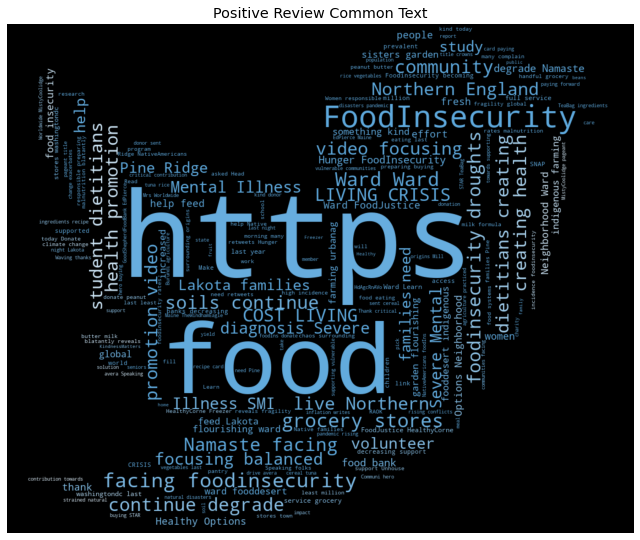

In [52]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Positive Review Common Text')
plt.axis('off')
plt.show()

In [53]:
all_words_negative = ' '.join(text for text in food['text'][food['label']==0])

In [54]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

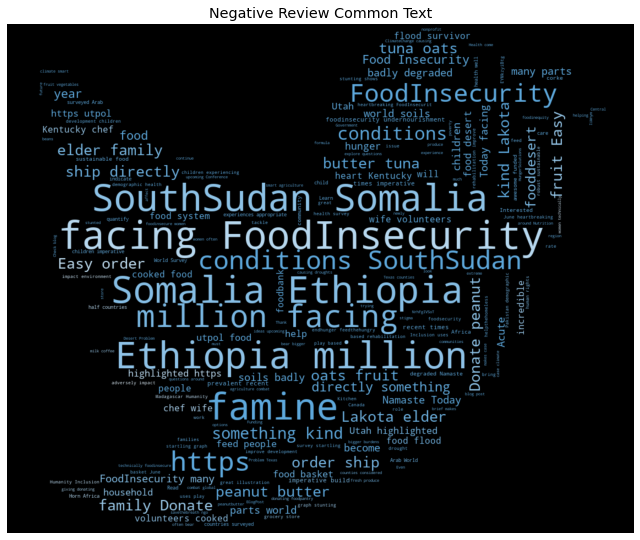

In [55]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Negative Review Common Text')
plt.axis('off')
plt.show()

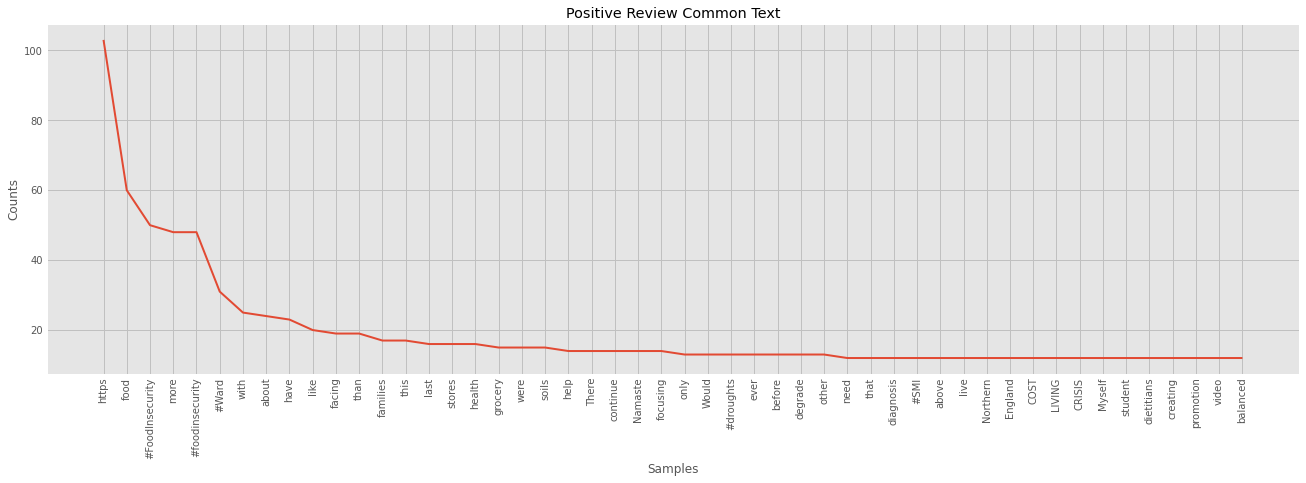

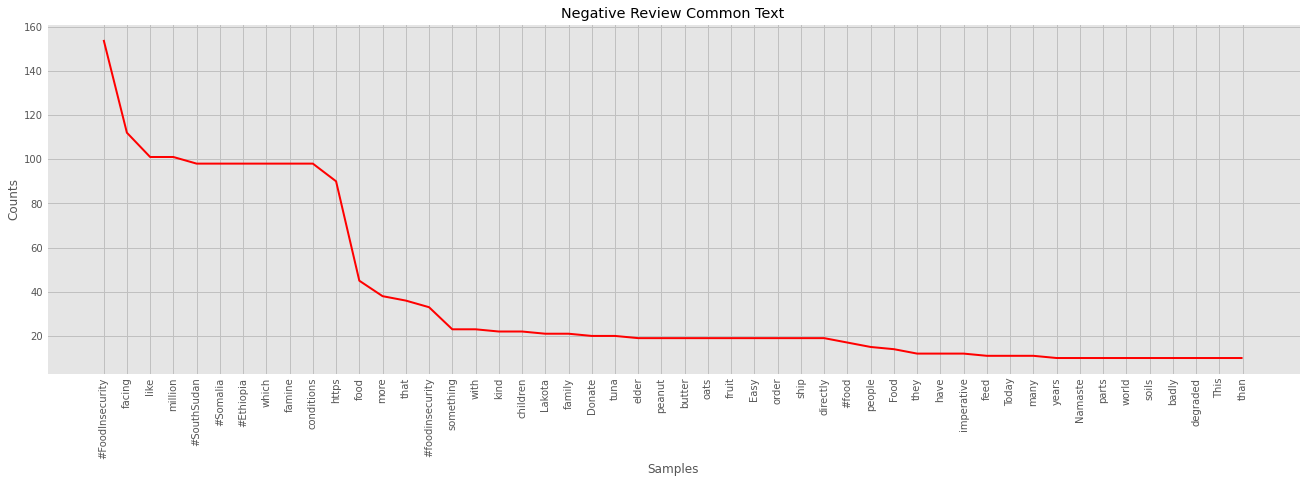

In [56]:
view_common_words(food)

In [88]:
food['location'] = location

In [89]:
food

,text,label,location
0,Waving thanks kind donor sent cereal tuna rice...,1.0,New Orleans
1,Waving thanks kind donor sent cereal tuna rice...,1.0,NaN
2,both council reps inherited nightmare from the...,0.0,"Cleveland, OH"
3,something kind Help feed Lakota family donatio...,1.0,NaN
4,something kind Help feed Lakota family donatio...,0.0,NaN
...,...,...,...
485,#SouthSudan #Somalia #Ethiopia million facing ...,0.0,NaN
486,#SouthSudan #Somalia #Ethiopia million facing ...,0.0,NaN
487,#SouthSudan #Somalia #Ethiopia million facing ...,0.0,NaN
488,#SouthSudan #Somalia #Ethiopia million facing ...,0.0,NaN


In [90]:
p_food = food[food['label'] == 1.0]
n_food = food[food['label'] == 0.0]

In [91]:
p_food

,text,label,location
0,Waving thanks kind donor sent cereal tuna rice...,1.0,New Orleans
1,Waving thanks kind donor sent cereal tuna rice...,1.0,NaN
3,something kind Help feed Lakota family donatio...,1.0,NaN
5,sisters garden flourishing #ward #fooddesert #...,1.0,"Dallas, TX"
6,Speaking folks this morning many complain abou...,1.0,Southern California
...,...,...,...
429,Know #OlderAdult struggling with #FoodInsecuri...,1.0,"Worcester, MA, USA"
443,#GMOs have increased yield crops increased pes...,1.0,Guwahati
453,Food doesn solve food insecurity Canada need l...,1.0,Canada
457,Only millions tons grain trapped Ukraine human...,1.0,Island of misfit buoys n gulls


In [92]:
n_food

,text,label,location
2,both council reps inherited nightmare from the...,0.0,"Cleveland, OH"
4,something kind Help feed Lakota family donatio...,0.0,NaN
13,find nice link #FoodDesert report found some o...,0.0,9 o'clock plaza & B
17,FLASHBACK year #FoodDesert https,0.0,NaN
36,Would like travel between minutes driving brin...,0.0,NaN
...,...,...,...
485,#SouthSudan #Somalia #Ethiopia million facing ...,0.0,NaN
486,#SouthSudan #Somalia #Ethiopia million facing ...,0.0,NaN
487,#SouthSudan #Somalia #Ethiopia million facing ...,0.0,NaN
488,#SouthSudan #Somalia #Ethiopia million facing ...,0.0,NaN


In [110]:
p_locations = np.array(p_food['location'])
p_text = np.array(p_food['text'])
p_loc_clean = []
p_text_clean = []
for i in range(len(p_locations)):
    if type(p_locations[i]) == str:
        p_loc_clean.append(p_locations[i])
        p_text_clean.append(p_text[i])

n_locations = np.array(n_food['location'])
n_text = np.array(n_food['text'])
n_loc_clean = []
n_text_clean = []
for i in range(len(n_locations)):
    if type(n_locations[i]) == str:
        n_loc_clean.append(n_locations[i])
        n_text_clean.append(n_text[i])

In [112]:
p_food = pd.DataFrame({"text":p_text_clean, "location":p_loc_clean})
p_food

,text,location
0,Waving thanks kind donor sent cereal tuna rice...,New Orleans
1,sisters garden flourishing #ward #fooddesert #...,"Dallas, TX"
2,Speaking folks this morning many complain abou...,Southern California
3,Speaking folks this morning many complain abou...,"San Bernardino, CA"
4,Speaking folks this morning many complain abou...,"Riverside, CA"
...,...,...
155,Know #OlderAdult struggling with #FoodInsecuri...,"Worcester, MA, USA"
156,#GMOs have increased yield crops increased pes...,Guwahati
157,Food doesn solve food insecurity Canada need l...,Canada
158,Only millions tons grain trapped Ukraine human...,Island of misfit buoys n gulls


In [117]:
n_food = pd.DataFrame({"text":n_text_clean, "location":n_loc_clean})
n_food

,text,location
0,both council reps inherited nightmare from the...,"Cleveland, OH"
1,find nice link #FoodDesert report found some o...,9 o'clock plaza & B
2,just watched enough uneaten food thrown into t...,"Philadelphia, PA"
3,There were full service grocery stores #washin...,"Washington, DC"
4,CSAs rural oklahoma Grow yourself Mexican prod...,The Muscogee Nation
...,...,...
151,#SouthSudan #Somalia #Ethiopia million facing ...,Tigray
152,#foodinsecurity households with children about...,West Midlands/Sheffield
153,#foodinsecurity households with children about...,"Sheffield, UK"
154,#SouthSudan #Somalia #Ethiopia million facing ...,ትግራይ ዓደይ ወርቂ ዓለመይ🌎💊👑♥🕊


In [113]:
p_loc = ' '.join(text for text in p_food['location'])

In [114]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(p_loc)

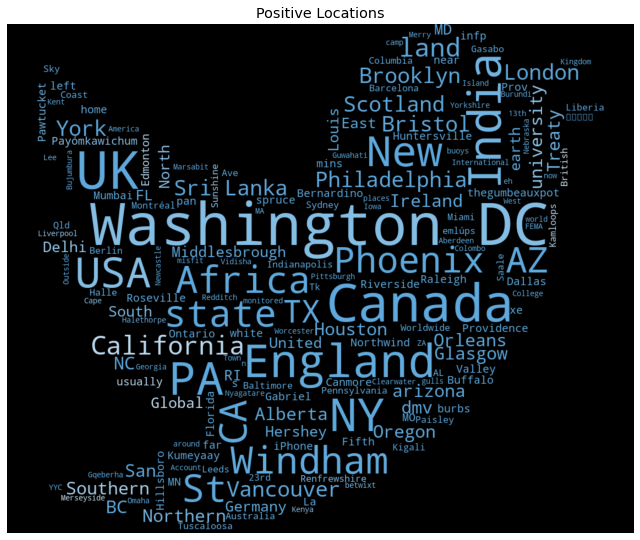

In [115]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Positive Locations')
plt.axis('off')
plt.show()

In [118]:
n_loc = ' '.join(text for text in n_food['location'])

In [119]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(n_loc)

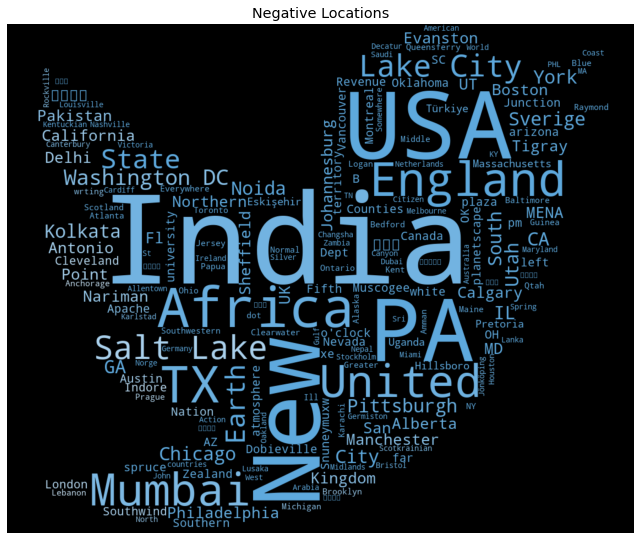

In [120]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Negative Locations')
plt.axis('off')
plt.show()